In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
data = np.loadtxt('haberman.txt')
data

array([[30., 64.,  1.,  1.],
       [30., 62.,  3.,  1.],
       [30., 65.,  0.,  1.],
       ...,
       [77., 65.,  3.,  1.],
       [78., 65.,  1.,  2.],
       [83., 58.,  2.,  2.]])

In [3]:
data.shape

(306, 4)

In [4]:
features = data[:, :3]
features.shape

(306, 3)

In [5]:
labels = data[:, -1]
labels.shape

(306,)

In [6]:
NUM_FEATURE = 3  # number of features
NUM_CLASS = 2  # number of classes

# Prior

In [7]:
prior1 = list(labels).count(1) / len(labels)  # class 1
prior2 = list(labels).count(2) / len(labels)  # class 2

prior = [prior1, prior2]
print(prior)

[0.7352941176470589, 0.2647058823529412]


# Likelihood

In [8]:
# samples of each class
class1 = np.array([d[0:3] for d in data if d[3] == 1])
class2 = np.array([d[0:3] for d in data if d[3] == 2])

In [9]:
# mean and covariance matrix for each class
mean1 = np.mean(class1, axis=0)  # mean along columns (features)
mean2 = np.mean(class2, axis=0)

cov1 = np.cov(class1, rowvar=False)
cov2 = np.cov(class2, rowvar=False)

In [10]:
print('covariance matrix of class 1 is sigular:', np.isclose(np.linalg.det(cov1), 0))
print('covariance matrix of class 2 is sigular:', np.isclose(np.linalg.det(cov2), 0))

covariance matrix of class 1 is sigular: False
covariance matrix of class 2 is sigular: False


In [11]:
# Gaussian distribution function for each class
def gauss_dist(mean, cov, x):
    return (1/(np.power(2*np.pi, NUM_FEATURE/2) * np.sqrt(np.linalg.det(cov)))) * (np.exp(-0.5*(x-mean).T@np.linalg.inv(cov)@(x-mean)))

In [12]:
likelihood = []

for sample in features:
    l1 = gauss_dist(mean1, cov1, sample)
    l2 = gauss_dist(mean2, cov2, sample)
    likelihood.append([l1, l2])

np.array(likelihood).shape

(306, 2)

# Confusion Matrix

In [13]:
# ref. to https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix

def confusion_matrix(labels, preds):
    matrix = np.zeros((NUM_CLASS, NUM_CLASS))
    for i in range(len(labels)):
        matrix[int(labels[i]-1)][int(preds[i]-1)] += 1
    return matrix

In [14]:
def avg_accuracy(confusion_matrix):
    return (confusion_matrix[0][0] + confusion_matrix[1][1]) / confusion_matrix.sum()

In [15]:
def class1_accuracy(confusion_matrix):  # sensitivity
    return confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1])

In [16]:
def class2_accuracy(confusion_matrix):  # specificity
    return confusion_matrix[1][1] / (confusion_matrix[1][0] + confusion_matrix[1][1])

# ML

In [17]:
ML_preds = []

for l in likelihood:
    if l[0] > l[1]:
        ML_preds.append(1.)
    else:
        ML_preds.append(2.)
        
ML_preds = np.array(ML_preds)
ML_preds.shape

(306,)

In [18]:
confML = confusion_matrix(labels, ML_preds)
confML

array([[195.,  30.],
       [ 48.,  33.]])

In [19]:
class1_accuracy(confML)

0.8666666666666667

In [20]:
class2_accuracy(confML)

0.4074074074074074

In [21]:
ML_acc = avg_accuracy(confML)
ML_acc

0.7450980392156863

# MAP

In [22]:
MAP_preds = []

for l in likelihood:
    if l[0]*prior[0] > l[1]*prior[1]:
        MAP_preds.append(1.)
    else:
        MAP_preds.append(2.)
        
MAP_preds = np.array(MAP_preds)
MAP_preds.shape

(306,)

In [23]:
confMAP = confusion_matrix(labels, MAP_preds)
confMAP

array([[215.,  10.],
       [ 63.,  18.]])

In [24]:
class1_accuracy(confMAP)

0.9555555555555556

In [25]:
class2_accuracy(confMAP)

0.2222222222222222

In [26]:
MAP_acc = avg_accuracy(confMAP)
MAP_acc

0.761437908496732

# Bayes

In [27]:
lamb = np.array([[0, 2], [1, 0]])

Bayes_preds = []

for l in likelihood:
    if l[0]*prior[0]*(lamb[1][0] - lamb[0][0]) > l[1]*prior[1]*(lamb[0][1] - lamb[1][1]):
        Bayes_preds.append(1.)
    else:
        Bayes_preds.append(2.)
        
Bayes_preds = np.array(Bayes_preds)
Bayes_preds.shape

(306,)

In [28]:
confBayes = confusion_matrix(labels, Bayes_preds)
confBayes

array([[204.,  21.],
       [ 56.,  25.]])

In [29]:
class1_accuracy(confBayes)

0.9066666666666666

In [30]:
class2_accuracy(confBayes)

0.30864197530864196

In [31]:
Bayes_acc = avg_accuracy(confBayes)
Bayes_acc

0.7483660130718954

## Comparison

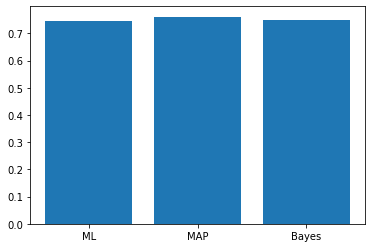

In [32]:
x = np.array(['ML', 'MAP', 'Bayes'])
y = np.array([ML_acc, MAP_acc, Bayes_acc])

plt.bar(x, y)
plt.show()